In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
sns.set_style("white") # seaborn 有五个主题可以设置 white是其中的一个

%matplotlib inline

#### tips：
- 最好对图片进行归一化操作，方便后面图片相乘，选取合适的阈值，以及再统一到255
- 各种直方图的方法，感觉plt.hist最好用，还有np.histgorm, cv2.calcHist
- percentile 直接求百分位
- threshold 最后可选参数可以直接选取otsu方法

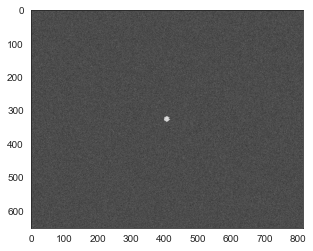

In [19]:
image_path = 'Images/exp4_1.tif'
image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
img = image/np.max(image)
plt.imshow(img,cmap = 'gray')

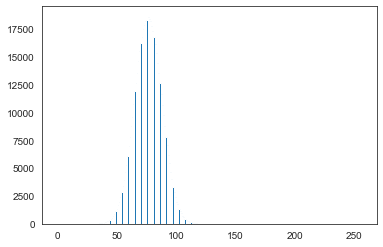

In [20]:
plt.hist(image.ravel(), 256, [0, 256])
plt.show()

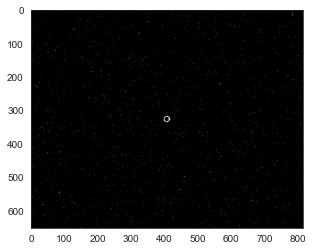

In [3]:
# 求梯度幅度图像 0.997
img_x=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
img_y=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
img_M = (img_x**2+img_y**2)**0.5
limit_997 = np.percentile(img_M,99.7)
ret, th = cv2.threshold(img_M, limit_997 ,np.max(img_M), cv2.THRESH_BINARY)
plt.imshow(th,"gray")

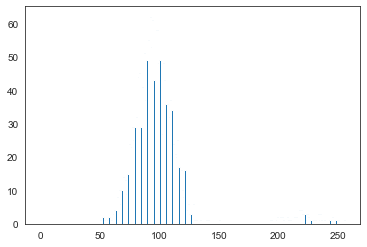

In [21]:
img_new = th*image
img_new = np.around(255*img_new/np.max(img_new))
img_new = np.uint8(img_new)
mask = np.where(img_new>0)
img_n0 = img_new[mask]
plt.hist(img_n0.ravel(), 256, [0, 256])
plt.show()

In [5]:
# 用于返回otsu的阈值
ret2, th2 = cv2.threshold(img_n0, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

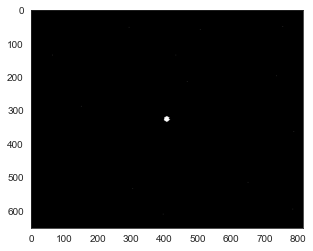

In [6]:
ret3, th3 = cv2.threshold(img, ret2/255 ,np.max(img), cv2.THRESH_BINARY)
plt.imshow(th3,"gray")